In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


Customers Head:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Head:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Head:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127

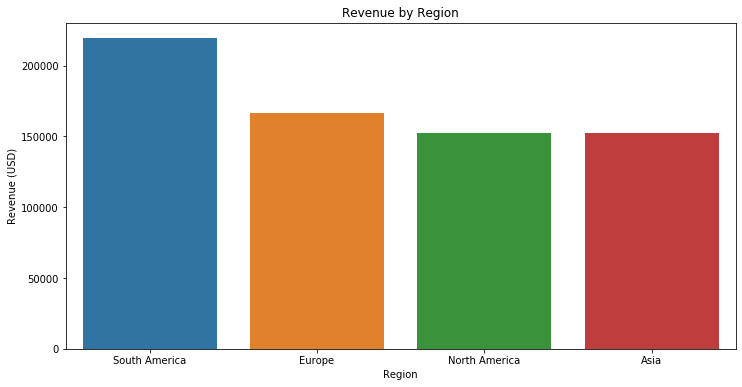

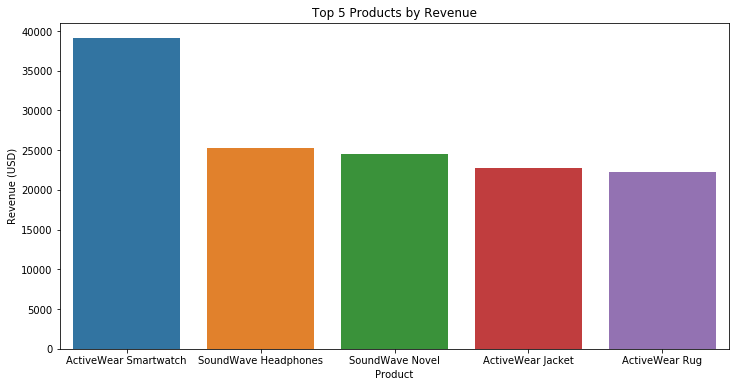

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


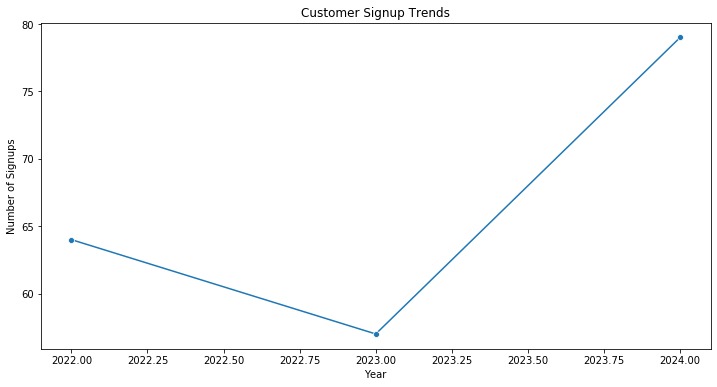

The most purchased product category is Books.
Seasonal trends indicate highest transactions during month 1.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

#Load dataset

customers = pd.read_csv("E:\Ecommercedata\Customers.csv")
products = pd.read_csv("E:\Ecommercedata\Products.csv")
transactions = pd.read_csv("E:\Ecommercedata\Transactions.csv")


print("Customers Head:\n", customers.head())
print("Products Head:\n", products.head())
print("Transactions Head:\n", transactions.head())

# Check for missing values

print("Missing Values in Customers:\n", customers.isnull().sum())
print("Missing Values in Products:\n", products.isnull().sum())
print("Missing Values in Transactions:\n", transactions.isnull().sum())


# Merge datasets for unified analysis

merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


# Add additional features for analysis

merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.month
merged_data['Year'] = pd.to_datetime(merged_data['TransactionDate']).dt.year


# Revenue by region


revenue_by_region = merged_data.groupby("Region")['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", revenue_by_region)


# Top 5 products by revenue

top_products = merged_data.groupby("ProductName")['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:\n", top_products)


signup_trends = pd.to_datetime(customers['SignupDate']).dt.year.value_counts().sort_index()

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.title("Revenue by Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("Region")
plt.show()



plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Products by Revenue")
plt.ylabel("Revenue (USD)")
plt.xlabel("Product")
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x=signup_trends.index.values, y=signup_trends.values, marker="o")
plt.title("Customer Signup Trends")
plt.ylabel("Number of Signups")
plt.xlabel("Year")
plt.show()

# The most purchased product category .

most_popular_category = merged_data['Category'].value_counts().idxmax()
print(f"The most purchased product category is {most_popular_category}.")


#  Seasonal trends indicate highest transactions.

peak_month = merged_data['TransactionMonth'].mode()[0]
print(f"Seasonal trends indicate highest transactions during month {peak_month}.")

Lookalike Recommendations saved to Lookalike.csv
Lookalike Recommendations:
   CustomerID SimilarCustomerID     Score
0      C0001             C0069  0.999329
1      C0001             C0154  0.997034
2      C0001             C0181  0.996712
3      C0002             C0029  0.999978
4      C0002             C0088  0.996020
5      C0002             C0062  0.995831
6      C0003             C0178  0.997929
7      C0003             C0038  0.996544
8      C0003             C0189  0.996037
9      C0004             C0017  0.999095
